In [34]:
# Add relevant Jupyter notebook extensions 

In [ ]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

# Simulate closed-loop

## Simulation imports

In [36]:
from uuv_mission.control import Controller
from uuv_mission.dynamic import ClosedLoop, Mission, Submarine

mission = Mission.from_csv("../data/mission.csv")
submarine = Submarine()

## Gain optimisation

In [37]:
import numpy as np
import numpy.typing as npt

def calculate_error_metric(other: npt.NDArray[np.float64]) -> float:
    error = mission.reference - other
    return np.power(error, 2).sum()

proportional_gains = np.arange(0, 0.5, 0.01)
derivative_gains = np.arange(0, 1.25, 0.025)

min_error = np.inf
best_proportional_gain = 0.0
best_derivative_gain = 0.0

for proportional_gain in proportional_gains:
    for derivative_gain in derivative_gains:
        controller = Controller(
            proportional_gain=proportional_gain,
            derivative_gain=derivative_gain,
            reference=mission.reference,
        )
        closed_loop = ClosedLoop(submarine, controller)
        
        cumulative_error = 0
        for _ in range(25):
            controller.reset()
            trajectory = closed_loop.simulate_with_random_disturbances(mission)
            cumulative_error += calculate_error_metric(trajectory.position[:, 1])
            
        if cumulative_error < min_error:
            min_error = cumulative_error
            best_proportional_gain = proportional_gain
            best_derivative_gain = derivative_gain

print(f"{best_proportional_gain=}\t{best_derivative_gain=}")

best_proportional_gain=np.float64(0.09)	best_derivative_gain=np.float64(0.75)


## Final simulation run
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

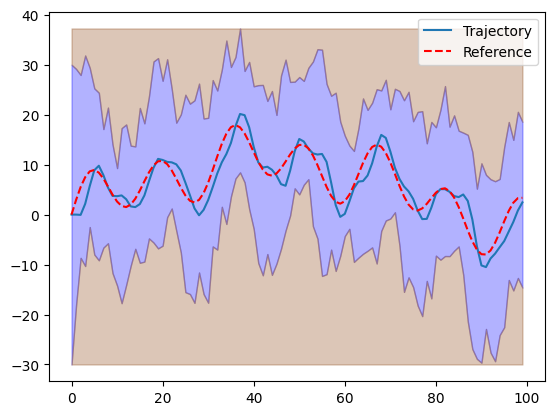

In [38]:
# Instantiate your controller (depending on your implementation)
controller = Controller(
    proportional_gain=best_proportional_gain,
    derivative_gain=best_derivative_gain,
    reference=mission.reference,
)
closed_loop = ClosedLoop(submarine, controller)

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)